In [1]:
MAIN_PATH = "/home/carlos/MasterDS/tfm"
JSON_DATA_PATH = '{}/data/json/'.format(MAIN_PATH)
CSV_DATA_PATH = '{}/data/csv/'.format(MAIN_PATH)

In [2]:
import sys
sys.path.insert(0, MAIN_PATH)

In [3]:
%load_ext autoreload
%autoreload 2
from scripts.models.ltr_svm_tf.train import LTRSVMTFTrain
from scripts.models.ltr_svm_tf.metrics import LTRSVMTFMetrics

%reload_ext autoreload

# Entrenamiento

In [7]:
ltr_params = {
    'mode': 'tfidf',
    'count_vec_kwargs': {'strip_accents': 'unicode'},
    'target_metric': 'cosine_tfidf',
    'metric_params': {'ngram_range': (1, 2), 'strip_accents': 'unicode'},
    'drop_teams': True,
    'lemma': True,
    'train_perc': 0.7,
    'val_perc': 0.2
}

model_params = {}

In [8]:
ltr_train = LTRSVMTFTrain(model_params=model_params, ltr_params=ltr_params)

Setting target metric to cosine_tfidf
Setting mode to tfidf


In [9]:
%%time
ltr_train.train()

Writing config in /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/5959a3c0eb/config.pickle
Loading training data from /home/carlos/MasterDS/tfm/data/ltr/features_targets/11aeeba295
Training model...
Writing model to /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/5959a3c0eb/ckpt.pickle
Writing model info to /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/5959a3c0eb/model_info.pickle
CPU times: user 6h 53min 2s, sys: 2.29 s, total: 6h 53min 4s
Wall time: 6h 53min 7s


## Salida

In [10]:
model = ltr_train.read_model()

In [11]:
model

Pipeline(steps=[('model', SVR())])

In [12]:
model_info = ltr_train.read_model_info()

In [13]:
model_info

{'best_score': None, 'best_params': None, 'model_out': None}

## Métricas

In [14]:
ltr_metrics = LTRSVMTFMetrics(ltr_train)

In [15]:
ltr_metrics.run()

Computing metric for train dataset
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/5959a3c0eb/train_metrics.pickle
Computing metric for validation dataset
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/5959a3c0eb/validation_metrics.pickle
Computing metric for test dataset
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/5959a3c0eb/test_metrics.pickle


Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/5959a3c0eb/train_metrics.pickle
mse : 0.014592267007753618
mae : 0.09801824328174337
r2 : 0.4029119142493094


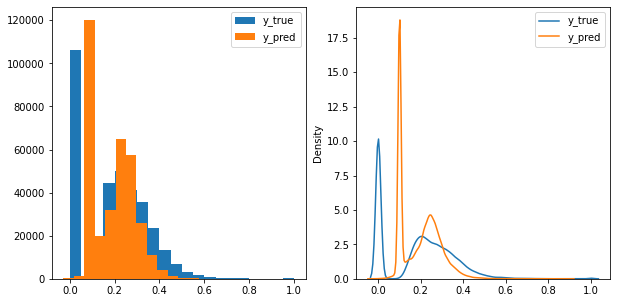

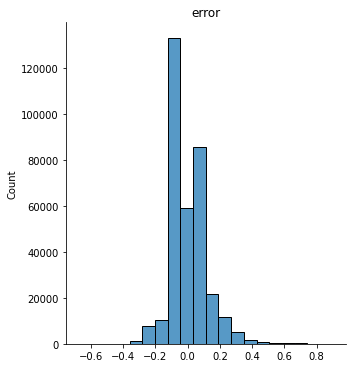

In [16]:
ltr_metrics.show_metrics('train')

Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/5959a3c0eb/validation_metrics.pickle
mse : 0.01948469042211908
mae : 0.11220690902518662
r2 : 0.20777654123452605


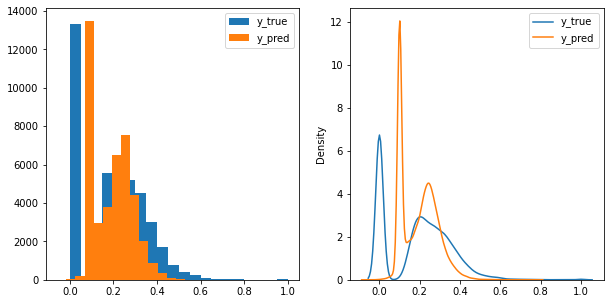

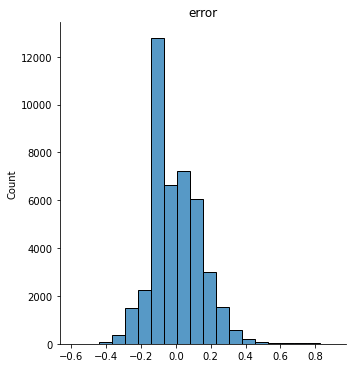

In [17]:
ltr_metrics.show_metrics('validation')